In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 

In [4]:
df = load_iris()
X = df.data
y = df.target

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=20)

In [29]:
lr = 0.1
it = 5000
N = y_train.size
np.random.seed(10)
input = 4
hidden = 2
output = 3
w1 = np.random.normal(scale = 0.5, size = (input,hidden))
w2 = np.random.normal(scale = 0.5, size=(hidden,output))

In [19]:
print(f"W1:\n{w1}\nW2:\n{w2}\n")

W1:
[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
W2:
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]



In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def mean_squared_error(y_pred, y_true):
  # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
  y_true_one_hot = np.eye(output)[y_true]
  # Reshape y_true_one_hot to match y_pred shape
  y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)
  # Compute the mean squared error between y_pred and y_true_reshaped
  error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)
  return error
def accuracy(y_pred, y_true):
  acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
  return acc.mean()
results = pd.DataFrame(columns=["mse", "accuracy"])

In [34]:
# Training loop
for itr in range(it):
  # Feedforward propagation
  Z1 = np.dot(X_train, w1)
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1, w2)
  A2 = sigmoid(Z2)

  # Calculate error
  mse = mean_squared_error(A2, y_train)
  acc = accuracy(np.eye(output)[y_train], A2)
  new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
  results = pd.concat([results, new_row], ignore_index=True)

  # Backpropagation
  E1 = A2 - np.eye(output)[y_train]
  dw1 = E1 * A2 * (1 - A2)
  E2 = np.dot(dw1, w2.T)
  dw2 = E2 * A1 * (1 - A1)

  # Update weights
  w2_update = np.dot(A1.T, dw1) / N
  w1_update = np.dot(X_train.T, dw2) / N
  w2 = w2 - lr * w2_update
  w1 = w1 - lr * w1_update

In [36]:
print (A2)

[[0.91977093 0.18548109 0.01901403]
 [0.04279691 0.39332086 0.59289875]
 [0.92168954 0.18483982 0.01866192]
 [0.02259137 0.41713369 0.69812041]
 [0.03174188 0.40638087 0.64779797]
 [0.0297399  0.40198365 0.64558561]
 [0.02099023 0.41837526 0.70655228]
 [0.0234111  0.41685203 0.6945393 ]
 [0.91899283 0.18490543 0.01894992]
 [0.91858299 0.18542298 0.0191194 ]
 [0.92669841 0.18392175 0.01792769]
 [0.92781475 0.18369575 0.01775859]
 [0.19696834 0.29896632 0.24130011]
 [0.92239543 0.18498144 0.01862441]
 [0.92232225 0.18495931 0.01862652]
 [0.02659877 0.4060559  0.66365015]
 [0.15250861 0.32642496 0.31750774]
 [0.92461365 0.18417125 0.01820204]
 [0.92550175 0.18413567 0.01810212]
 [0.92732759 0.18387901 0.01785222]
 [0.02625402 0.41308811 0.67771051]
 [0.16290395 0.34095392 0.33948523]
 [0.10354892 0.33889137 0.38341564]
 [0.92694286 0.18376682 0.01786593]
 [0.92592956 0.18394132 0.01801193]
 [0.16500483 0.31074621 0.27937673]
 [0.03583246 0.39833115 0.6205801 ]
 [0.02993057 0.41003955 0.66

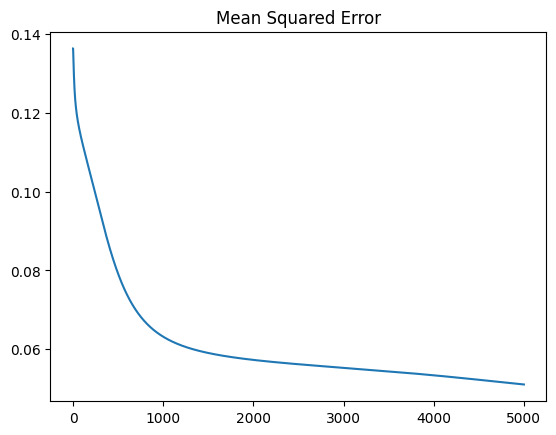

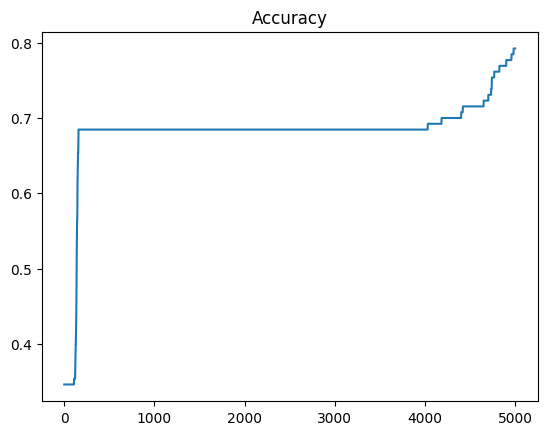

In [35]:
# Visualizing the results
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()